In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [16]:
import requests
from io import StringIO
import seaborn as sns

In [10]:
url="http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source=requests.get(url).text
poll_data=StringIO(source)
column=['Pollster','Start Date','End Date','Entry Date/Time (ET)','Number of Observations','Population','Mode','Obama','Romney','Undecided','Pollster URL','Source URL','Partisan','Affiliation']

In [12]:
poll_df=pd.read_csv(poll_data,usecols=column)

In [13]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 14 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
dtypes: float64(4), object(10)
memory usage: 64.2+ KB


In [14]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


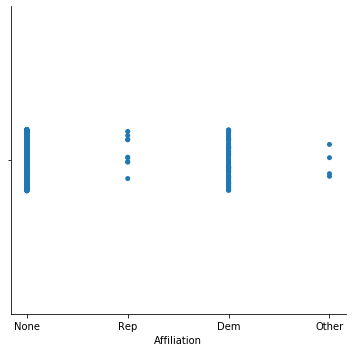

In [18]:
sns.catplot('Affiliation',data=poll_df)

In [19]:
avg=pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

In [20]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [22]:
std=pd.DataFrame(poll_df.std())
std.drop("Number of Observations",axis=0,inplace=True)
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


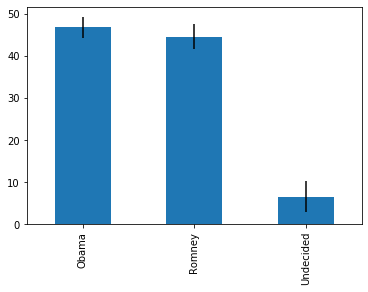

In [23]:
avg.plot(yerr=std,kind='bar',legend=False)

In [24]:
poll_avg=pd.concat([avg,std],axis=1)

In [26]:
poll_avg.columns=['Average','STD']

In [27]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [28]:
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided
0,2009-03-13,1403.0,44.0,44.0,12.0
1,2009-04-17,686.0,50.0,39.0,11.0
2,2009-05-14,1000.0,53.0,35.0,12.0
3,2009-06-12,638.0,48.0,40.0,12.0
4,2009-07-15,577.0,49.0,40.0,11.0
